<a href="https://colab.research.google.com/github/Noppadol35/IS/blob/main/Clustering_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
n_samples = 500

# Generate synthetic customer data
income = np.random.normal(300000, 50000, n_samples)
spending_score = np.random.uniform(30, 10, n_samples)
age = np.random.normal(30, 10, n_samples)
purchases = np.random.randint(1, 15, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'Annual_income' : income,
    'Spending_score' : spending_score,
    'Age' : age,
    'Purchases_Per_Month' : purchases
})

In [ ]:
df.head()

,Annual_income,Spending_score,Age,Purchases_Per_Month
0,324835.707651,17.081655,28.328819,8
1,293086.784941,18.584434,31.467137,3
2,332384.426905,22.878065,42.065090,8
3,376151.492820,10.269695,21.830643,1
4,288292.331264,17.884504,33.686733,5


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

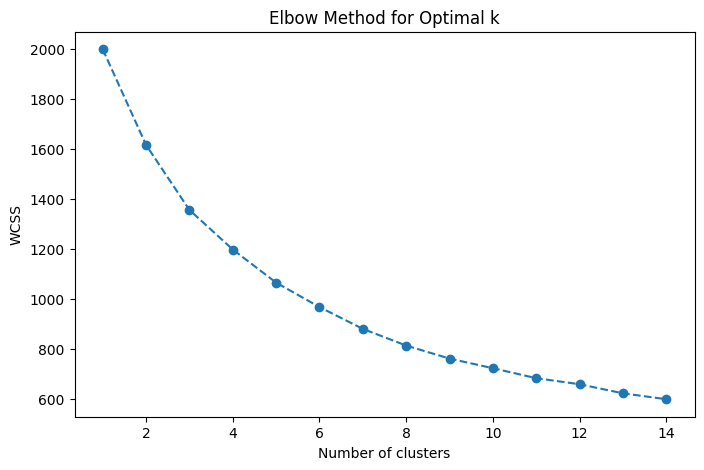

In [ ]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state = 42, n_init = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Ensure both x and y have the same length
x_values = range(1, len(wcss) + 1)  # Adjust x-axis values

plt.figure(figsize=(8, 5))
plt.plot(x_values, wcss, marker='o', linestyle='--')  # Use x_values
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

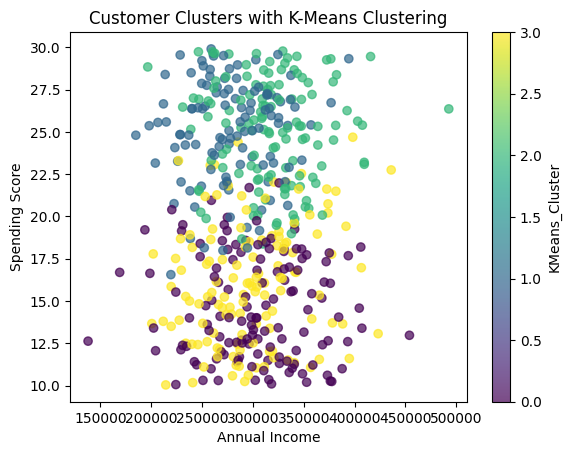

In [ ]:
plt.scatter(df['Annual_income'], df['Spending_score'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters with K-Means Clustering')
plt.colorbar(label = 'KMeans_Cluster')
plt.show()

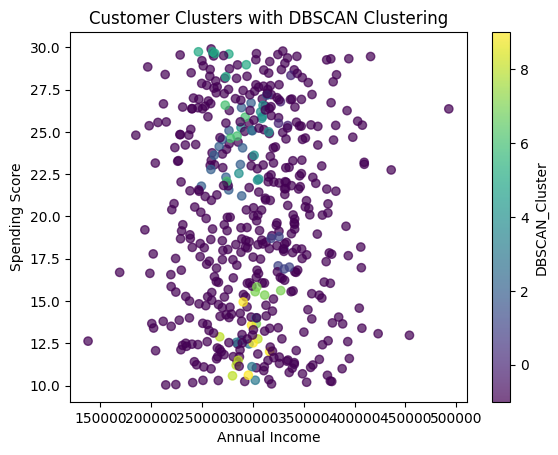

In [ ]:
plt.scatter(df['Annual_income'], df['Spending_score'], c=df['DBSCAN_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters with DBSCAN Clustering')
plt.colorbar(label = 'DBSCAN_Cluster')
plt.show()

จากชุดข้อมูลนี้ K-Means ดูเหมาะสมกว่า เนื่องจากการใช้ Elbow Method ช่วยเลือกจำนวนคลัสเตอร์ที่ดีที่สุด และผลลัพธ์มีความชัดเจน อย่างไรก็ตาม หากพบว่ามี outliers หรือข้อมูลไม่กระจายตัวดี ควรใช้ DBSCAN เพื่อวิเคราะห์เพิ่มเติม